# Exercise 1

In [ ]:
from Automata import Automata
from utils import visualize, plotTask5Test4

import math
import random

import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

## Task 1 - Setting up the modeling environment

Scenario to show that our implementation allows for different pedestrians and obstacles editing an easy JSON file (using as input for the automata the file path) or writing in a notebook a dictionary as follow: 

In [ ]:
configTask1 = {
    "name": "Task1Scenario",
    "dimensions": {
        "width": 5,
        "height": 5
    },
    "pedestrians": [
        [1, 0, 2]
    ],
    "targets": [
        [[1], 4, 2]
    ],
    "obstacles": [
        [2, 2], [2, 1], [2, 3]
    ]
}

In [ ]:
task1Automata = Automata(configTask1)

Let's take a look at the initial state:

In [ ]:
visualize(task1Automata.getState())

Let's simulate for 10 time steps and let's take a look at the final state with the followed path:

In [ ]:
task1Automata.simulate(task1Automata.basicOperator, 10, avoidObstacles=True)

In [ ]:
visualize(task1Automata.getStateWithPaths())

## Task 2 - First step of a single pedestrian

Scenario:
- 50 by 50 cells (2500 in total)
- Single pedestrian at position (5, 25)
- Target at (25, 25)

In [ ]:
configTask2 = {
    "name": "Task2Scenario",
    "dimensions": {
        "width": 49,
        "height": 49
    },
    "pedestrians": [
        [1, 4, 24]
    ],
    "targets": [
        [[1], 24, 24]
    ],
    "obstacles": []
}

In [ ]:
task2Automata = Automata(configTask2)

Let's take a look at the initial state:

In [ ]:
visualize(task2Automata.getState())

Let's simulate for 25 time steps and let's take a look at the final state with the followed path:

In [ ]:
task2Automata.simulate(task2Automata.basicOperator, 25)

In [ ]:
visualize(task2Automata.getStateWithPaths())

## Task 3 - Interaction of pedestrians

Scenario:
- 50 by 50 cells (2500 in total)
- 5 equidistant pedestrians on the same circle 
- 1 single target for all of them
- 25 Steps

In [ ]:
# First we need to find 5 equidistant points on our circle with r = 20 and center (25,25)
points = []
no_points = 5
for i in range(no_points):
    x = int(25.0 + 20 * math.cos(2 * math.pi * i / no_points))
    y = int(25.0 + 20 * math.sin(2 * math.pi * i / no_points))
    points.append((x,y))

# We have now our final points
print(points)

In [ ]:
configTask3 = {
    "name": "Task3Scenario",
    "dimensions": {
        "width": 49,
        "height": 49
     },
    "pedestrians": [
        [1, 45, 25], [2, 31, 44], [3, 8, 36], [4, 8, 13], [5, 31, 5]
     ],
     "targets": [
        [[1,2,3,4,5], 24, 24]
     ],
     "obstacles": []
}

In [ ]:
task3Automata = Automata(configTask3)

Let's take a look at the initial state:

In [ ]:
visualize(task3Automata.getState())

Let's simulate for 25 time steps **avoiding pedestrians** and let's take a look at the final state with the followed paths:

In [ ]:
task3Automata.simulate(task3Automata.basicOperator, 25, avoidPedestrians=True)

In [ ]:
visualize(task3Automata.getStateWithPaths())

In [ ]:
Let's take a look at the steps:

In [ ]:
paths = task3Automata.getPaths()
for path in paths:
    print(len(paths[path]))

Let's simulate for 25 time steps **without avoiding pedestrians** and let's take a look at the final state with the followed paths:

In [ ]:
task3Automata = Automata(configTask3)
task3Automata.simulate(task3Automata.basicOperator, 25, avoidPedestrians=False)

In [ ]:
visualize(task3Automata.getStateWithPaths())

Let's take a look at the steps:

In [ ]:
paths = task3Automata.getPaths()
for path in paths:
    print(len(paths[path]))

## Task 4 - Obstacle avoidance

### Scenario 4.1 - What happens in the scenario shown in figure (10) of [8] (bottleneck), if obstacle avoidance is not implemented?

In [ ]:
pedestrians = []
id = 1

# Create pedestrians
for i in range (1, 10):
    for j in range(2, 19):
        pedestrians.append([id, i, j, 0])
        id = id + 1
        if id == 151:
            break

# Distribute velocities
bunchSize = 25 # 150 pedestrians / 6 generations (20, 30, 40, 50, 60, 70)
for i in range(0, 150):
    if i < bunchSize: # 70s
        pedestrians[i][3] = random.uniform(1.07, 1.07)
    elif i < bunchSize*2: # 60s
        pedestrians[i][3] = random.uniform(1.27, 1.27)
    elif i < bunchSize*3: # 50s
        pedestrians[i][3] = random.uniform(1.39, 1.43)
    elif i < bunchSize*4: # 40s
        pedestrians[i][3] = random.uniform(1.46, 1.5)
    elif i < bunchSize*5: # 30s
        pedestrians[i][3] = random.uniform(1.52, 1.56)
    else: # 20s
        pedestrians[i][3] = random.uniform(1.6, 1.64)
        
configTask41 = {
    "name": "Task41Scenario",
    "dimensions": {
        "width": 71,
        "height": 22
    },
    "pedestrians": pedestrians,
    "targets": [
        [[i for i in range(1, 150)], 65, 10],
    ],
    "obstacles": [[20, i] for i in range(0, 22) if not i == 10 and not i == 11] + \
    [[i, 9] for i in range(21, 30)] + \
    [[i, 12] for i in range(21, 30)] + \
    [[30, i] for i in range(0, 22) if not i == 10 and not i == 11] + \
    [[51, i] for i in range(0, 22) if not i == 10 and not i == 11],
    "step": 0.5
}

task41Automata = Automata(configTask41)

In [ ]:
task41Automata.simulateAndVisualizeWithTime(task41Automata.operatorWithCostFunctionRiMEA, 20, size = (15, 5), avoidObstacles=False)

### Scenario 4.2 - What happens for the "chicken test" scenario, figure 5?

**Without obstacle avoidance** and for 20 steps:

In [ ]:
configTask42 = {
    "name": "Task42Scenario",
    "dimensions": {
        "width": 9,
        "height": 9
    },
    "pedestrians": [
        [1, 0, 4]
    ],
    "targets": [
        [[1, 2], 8, 4]
    ],
    "obstacles": [
        [3, 1], [4, 1], [5, 1], [5, 3], [5, 4], [5, 5], [5, 7], [4, 7], [3, 7], [5, 2], [5, 6]
    ]
}
task42Automata = Automata(configTask42)
task42Automata.simulate(task42Automata.operatorWithCostFunction, 20, avoidObstacles = False)
visualize(task42Automata.getStateWithPaths())

**With obstacle avoidance** and for 20 steps:

In [ ]:
task42Automata = Automata(configTask42)
task42Automata.simulate(task42Automata.operatorWithCostFunction, 20, avoidObstacles = True)
visualize(task42Automata.getStateWithPaths())

## Task 5 - Tests

In [ ]:
### TEST1: RiMEA scenario 1 (straight line, ignore premovement time)

In [ ]:
rimea1 = {
    "name": "Task5TEST1",
    "dimensions": {
        "width": 80,
        "height": 4
    },
    "pedestrians": [
        [1, 0, 1, 1.33]
    ],
    "targets": [
        [[1], 79, 1]
    ],
    "obstacles": [],
    "step": 0.5
}

rimea1Automata = Automata(rimea1)

In [ ]:
rimea1Automata.simulateAndVisualizeWithTime(rimea1Automata.operatorWithCostFunctionRiMEA, 50, size = (25, 2))

In [ ]:
### TEST2: RiMEA scenario 4 (fundamental diagram, be careful with periodic boundary conditions)

In [ ]:
rimea2 = {
    "name": "Task5TEST2",
    "dimensions": {
        "width": 24,
        "height": 24
    },
    "pedestrians": [],
    "targets": [
        [], _, _]
    ],
    "obstacles": [],
    "step": 0.5
}

rimea2Automata = Automata(rimea2)

In [ ]:
rimea2Automata.simulateAndVisualizeWithTime(rimea2Automata.operatorWithCostFunctionRiMEA, 80, size = (15, 15))

### TEST3: RiMEA scenario 6 (movement around a corner)

In [ ]:
ob = []
for i in range(0, 20):
    ob.append([i, 4])
    
for i in range(4, 24):
    ob.append([19, i])    
    
ped = []
id = 1
for i in range(0, 10, 2):
    ped.append([id, i, 0, 0.5])
    id += 1
    
for i in range(0, 10, 2):
    ped.append([id, i, 2, 0.5])
    id += 1
    
    
for i in range(1, 10, 2):
    ped.append([id, i, 1, 0.5])
    id += 1
    
for i in range(1, 11, 2):
    ped.append([id, i, 3, 0.5])
    id += 1
    if (id == 21):
        break
    
rimea3 = {
    "name": "Task5TEST3",
    "dimensions": {
        "width": 24,
        "height": 24
    },
    "pedestrians": ped,
    "targets": [
        [[i for i in range(1, 21)], 21, 23]
    ],
    "obstacles": ob,
    "step": 0.5
}

rimea3Automata = Automata(rimea3)

In [ ]:
rimea3Automata.simulateAndVisualizeWithTime(rimea3Automata.operatorWithCostFunctionRiMEA, 80, size = (15, 15))

### TEST4: RiMEA scenario 7 (demographic parameters, visual comparison of  gure and results is suffcient. Simple and correct statistical test gives 5 bonus points if you argue why your choice of test is correct).

In [ ]:
ped = []

twenties = []
thirties = []
forties = []
fifties = []
sixties = []
seventies = []

# randomly place 50 pedestrians on the grid
ped = np.random.randint(16, size=(50, 2)).tolist()

# add Ids to the pedestrians
for i, p in enumerate(ped):
    p[0] = p[0]
    p[1] = p[1]
    p.insert(0, i+1)

# Finally, we add the speed according to their age
for i, p in enumerate(ped):
    if ((i+1) in list(range(1,10))):
        # 20 years old
        p.insert(4, random.uniform(1.6, 1.64))
        twenties.append(p[0])
    if ((i+1) in list(range(10,19))):
        # 30 years old
        p.insert(4, random.uniform(1.52, 1.56))
        thirties.append(p[0])
    if ((i+1) in list(range(19,28))):
        # 40 years old
        p.insert(4, random.uniform(1.46, 1.5))
        forties.append(p[0])
    if ((i+1) in list(range(28,37))):
        # 50 years old
        p.insert(4, random.uniform(1.39, 1.43))
        fifties.append(p[0])
    if ((i+1) in list(range(37,46))):
        # 60 years old
        p.insert(4, random.uniform(1.27, 1.27))
        sixties.append(p[0])
    if ((i+1) in list(range(46,51))):
        # 70 years old
        p.insert(4, random.uniform(1.07, 1.07))
        seventies.append(p[0])
        

rimea1 = {
    "name": "Task1Scenario",
    "dimensions": {
        "width": 24,
        "height": 24 # 1 cell = 0.4 meter ===> 2 m wide = (0.4m/cell)/2m = 
    },
    "pedestrians": ped,
    "targets": [
        [[i for i in range(1, 51)], 23, 12]
    ],
    "obstacles": [],
    
    "step": 0.5
}
rimea1Automata = Automata(rimea1)
rimea1Automata.simulateAndVisualizeWithTime(rimea1Automata.operatorWithCostFunctionRiMEA, 80, size = (15, 15))

In [ ]:
def find_average_walking_speed(ids):
    avg = 0.0
    for pedestrian in rimea1Automata.pedestrians:
        if (pedestrian[0] in ids):
            if (rimea1Automata.times[pedestrian[0]] > 0) :
                avg = avg + ( 0.5 * (len(rimea1Automata.paths[pedestrian[0]]) - 1) / ( rimea1Automata.times[pedestrian[0]] ))

    return (avg / len(ids))

Let's calculate the average speeds

In [ ]:
speeds = []
speeds.append(find_average_walking_speed(twenties))
speeds.append(find_average_walking_speed(thirties))
speeds.append(find_average_walking_speed(forties))
speeds.append(find_average_walking_speed(fifties))
speeds.append(find_average_walking_speed(sixties))
speeds.append(find_average_walking_speed(seventies))
speeds

In [ ]:
# Now we want to calculate also each individual walking speed, based on their age
overall_speeds = {"20": [], "30": [], "40": [], "50": [], "60": [], "70": []}

age = 20
for pedestrian in rimea1Automata.pedestrians:
    time = 1
    if (rimea1Automata.times[pedestrian[0]] > 0):
        time = rimea1Automata.times[pedestrian[0]]

    new_speed = [ 0.5 * len(rimea1Automata.paths[pedestrian[0]]) / ( time )]
    
    if (pedestrian[0] in twenties):
            overall_speeds["20"] = overall_speeds["20"] + new_speed
    if (pedestrian[0] in thirties):
            overall_speeds["30"] = overall_speeds["30"] + new_speed
    if (pedestrian[0] in forties):
            overall_speeds["40"] = overall_speeds["40"] + new_speed
    if (pedestrian[0] in fifties):
            overall_speeds["50"] = overall_speeds["50"] + new_speed
    if (pedestrian[0] in sixties):
            overall_speeds["60"] = overall_speeds["60"] + new_speed
    if (pedestrian[0] in seventies):
            overall_speeds["70"] = overall_speeds["70"] + new_speed
    
    
    


In [ ]:
# Now lets plot the average speeds

age = 20
for speed in speeds:
    plt.scatter(age, speed)
    age += 10

plt.xlabel("AGE")
plt.ylabel("WALKING SPEED")
plt.show()

In [ ]:
# And finally, lets plot the individual walking speeds

for age in overall_speeds:
    for walking_speed in overall_speeds[age]:
        plt.scatter(age, walking_speed)
        
plt.xlabel("AGE")
plt.ylabel("WALKING SPEED")
plt.show()

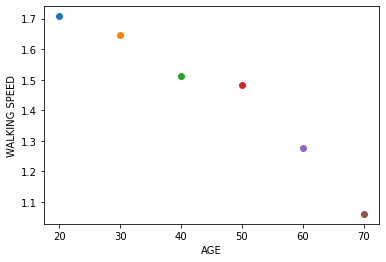

In [44]:
# Now lets plot the average speeds

age = 20
for speed in speeds:
    plt.scatter(age, speed)
    age += 10

plt.xlabel("AGE")
plt.ylabel("WALKING SPEED")
plt.show()

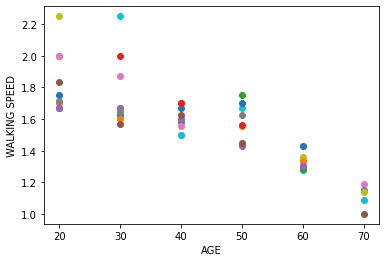

In [45]:
# And finally, lets plot the individual walking speeds

for age in overall_speeds:
    for walking_speed in overall_speeds[age]:
        plt.scatter(age, walking_speed)
        
plt.xlabel("AGE")
plt.ylabel("WALKING SPEED")
plt.show()